# This is for testing and running the descriptive (modified Gaussian) fits

In [208]:
import sys
base = '/ser/1.2/p2/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/' # CNS
sys.path.append(base + 'helper_functions/')

In [87]:
import numpy as np
import descr_fit as dfit
import helper_fcns as hfunc
import autoreload
import matplotlib.pyplot as plt
%matplotlib inline

In [322]:
autoreload.reload(dfit);
autoreload.reload(hfunc);

## Checking the fitting/loss part

In [323]:
z = dfit.fit_descr(4, base + 'Structures/')

Doing the work, now


/ser/1.2/p2/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/Functions/descr_fit.py:41: RuntimeWarning: invalid value encountered in less
  con_check = abs(trial['con'][0] - center_con) < epsilon;
/ser/1.2/p2/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/Functions/descr_fit.py:42: RuntimeWarning: invalid value encountered in less
  ori_check = abs(trial['ori'][0] - ori_pref) < epsilon;


In [326]:
dFitz = np.load(data_loc + 'descrFits.npy').item()

In [331]:
dFitz[3]['params'][0, 0, :]

array([   1.06135408,  104.33910637,    5.45622815,    1.03539716,
          0.32633283])

### Plots for those interested

In [228]:
stimSf = np.logspace(-1, 1, 100);
prefSf = 1;
respFloor = 10;
respRF = 65;
sigLow = 1;
sigHigh = 2;

params = [1.0614,  104.3391,    5.4562,    1.0354,    0.3263];
#params = [respFloor, respRF, prefSf, sigLow, sigHigh];

In [33]:
data_loc = '/ser/1.2/p2/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/Structures/'

In [34]:
dL = np.load(data_loc + 'dataList.npy').item();

In [256]:
exCell = np.load(data_loc + dL['unitName'][3] + '_sfm.npy').item();

In [164]:
exCell['sfm']['exp']['sf'][0][0]

array([  0.3  ,   0.426,   0.605,   0.86 ,   1.22 ,   1.73 ,   2.46 ,
         3.5  ,   4.96 ,   7.04 ,  10.   ])

In [36]:
trial = exCell['sfm']['exp']['trial'];

In [194]:
len(exCell['sfm']['exp']['sfRateMean'][0][0])

11

In [200]:
exCell['sfm']['exp']['sponRateMean']

7.835161865765083

In [338]:
params = dFitz[3]['params'][4, 0, :];
fit = dfit.flexible_Gauss(params, stimSf);

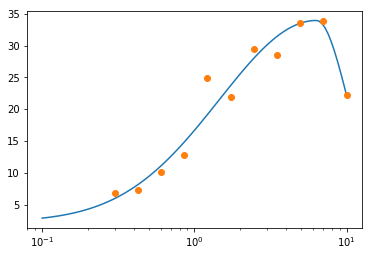

In [339]:
plt.semilogx(stimSf, fit);
plt.semilogx(exCell['sfm']['exp']['sf'][0][0], exCell['sfm']['exp']['sfRateMean'][4][0], 'o')